#Machine Learning Models: Random Forest Regression

##Import packages and mount drive

In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from scipy.stats import pearsonr,spearmanr
from sklearn.ensemble import RandomForestRegressor
import time
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from scipy.stats import randint
import random

In [2]:
from google.colab import drive # this is how I loaded the data in today. run this code and create a shortcut in your google drive for this folder 
drive.mount('/content/drive')

Mounted at /content/drive


##Import median imputed data

In [3]:
train1 = pd.read_csv("/content/drive/MyDrive/ML Project/Data for modeling/median imputer/training_impute_median_norm.csv")
test1 =  pd.read_csv("/content/drive/MyDrive/ML Project/Data for modeling/median imputer/testing_impute_median_norm.csv") 
valid1 =  pd.read_csv("/content/drive/MyDrive/ML Project/Data for modeling/median imputer/validation_impute_median_norm.csv") 

In [ ]:
print(train1.shape)
print(train1.head())
print(test1.shape)
print(test1.head())

(1710, 327)
   subject_id  slope_following_9_months  ...  site_onset2  site_onset5
0      553099                 -0.887366  ...            0            0
1        8471                 -0.954460  ...            1            0
2      534458                 -0.521771  ...            0            0
3      225766                 -0.454279  ...            1            0
4      161271                 -0.457694  ...            0            0

[5 rows x 327 columns]
(428, 327)
   subject_id  slope_following_9_months  ...  site_onset2  site_onset5
0      312890                  0.313780  ...            1            0
1       38898                 -0.187881  ...            0            0
2      441498                  0.127885  ...            0            0
3      701123                 -1.014556  ...            1            0
4      230653                 -0.111490  ...            0            0

[5 rows x 327 columns]


##Create training and testing matrices

In [4]:
X_train1=train1.iloc[:,2:]
y_train1=train1.iloc[:,1]
print(X_train1.shape)
print(y_train1.shape)

(1710, 325)
(1710,)


In [5]:
X_test1=test1.iloc[:,2:]
y_test1=test1.iloc[:,1]
print(X_test1.shape)
print(y_test1.shape)

(428, 325)
(428,)


In [6]:
y_test1.describe()

count    428.000000
mean      -0.832762
std        0.842031
min       -6.087333
25%       -1.222548
50%       -0.715107
75%       -0.303395
max        3.261071
Name: slope_following_9_months, dtype: float64

In [7]:
X_valid1=valid1.iloc[:,2:]
y_valid1=valid1.iloc[:,1]
print(X_valid1.shape)
print(y_valid1.shape)

(1053, 325)
(1053,)


In [8]:
X=X_train1.append(X_test1)
y=y_train1.append(y_test1)
print(X.shape)
print(y.shape) 

(2138, 325)
(2138,)


##Import KNN imputed data

In [9]:
train2 = pd.read_csv("/content/drive/MyDrive/ML Project/Data for modeling/knn imputer/training_impute_knn_norm.csv")
test2 =  pd.read_csv("/content/drive/MyDrive/ML Project/Data for modeling/knn imputer/testing_impute_knn_norm.csv") 
valid2 =  pd.read_csv("/content/drive/MyDrive/ML Project/Data for modeling/knn imputer/validation_impute_knn_norm.csv") 

In [ ]:
print(train2.shape)
print(train2.head())
print(test2.shape)
print(test2.head())

(1710, 327)
   subject_id  slope_following_9_months  ...  site_onset2  site_onset5
0      553099                 -0.887366  ...            0            0
1        8471                 -0.954460  ...            1            0
2      534458                 -0.521771  ...            0            0
3      225766                 -0.454279  ...            1            0
4      161271                 -0.457694  ...            0            0

[5 rows x 327 columns]
(428, 327)
   subject_id  slope_following_9_months  ...  site_onset2  site_onset5
0      312890                  0.313780  ...            1            0
1       38898                 -0.187881  ...            0            0
2      441498                  0.127885  ...            0            0
3      701123                 -1.014556  ...            1            0
4      230653                 -0.111490  ...            0            0

[5 rows x 327 columns]


##Create training and testing matrices

In [ ]:
X_train2=train2.iloc[:,2:]
y_train2=train2.iloc[:,1]
print(X_train2.shape)
print(y_train2.shape)

(1710, 325)
(1710,)


In [ ]:
X_test2=test2.iloc[:,2:]
y_test2=test2.iloc[:,1]
print(X_test1.shape)
print(y_test1.shape)

(428, 325)
(428,)


In [ ]:
y_test2.describe()

count    428.000000
mean      -0.832762
std        0.842031
min       -6.087333
25%       -1.222548
50%       -0.715107
75%       -0.303395
max        3.261071
Name: slope_following_9_months, dtype: float64

In [ ]:
X_test2.iloc[:,275]=0 #NaN convert back to 0

In [ ]:
X_valid2=valid2.iloc[:,2:]
y_valid2=valid2.iloc[:,1]
print(X_valid2.shape)
print(y_valid2.shape)

(1053, 325)
(1053,)


In [ ]:
X=X_train2.append(X_test2)
y=y_train2.append(y_test2)
print(X.shape)
print(y.shape) 

(2138, 325)
(2138,)


##Evaluation function

In [ ]:
def evaluation_metrics(y_test, y_pred,X_train):
  R2 = r2_score(y_test, y_pred).round(4)
  Adjusted_R2 = (1 - (1-r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_train.shape[1]-1)).round(4)
  MAE = mean_absolute_error(y_test, y_pred).round(4)
  MSE = mean_squared_error(y_test, y_pred).round(4)
  RMSE = np.sqrt(mean_squared_error(y_test, y_pred)).round(4)
  Pearson_Correlation = pearsonr(y_test, y_pred)[0].round(4)

  evaluatin_table = pd.DataFrame.from_dict({"R^2": R2,
                                            "Adjusted R^2": Adjusted_R2,
                                            "MAE": MAE,
                                            "MSE": MSE,
                                            "RMSE": RMSE,
                                            "Pearson_Correlation": [Pearson_Correlation],
                                            }, 
  )

  return evaluatin_table

##Training with default parameters

In [ ]:
regrf = RandomForestRegressor(max_depth=2, random_state=2021)

start_time = time.time()
regrf.fit(X_train1, y_train1)
print("--- %.3f seconds ---" % (time.time() - start_time))
y_pred1=regrf.predict(X_test1)

start_time = time.time()
regrf.fit(X_train2, y_train2)
y_pred2=regrf.predict(X_test2)
print("--- %.3f seconds ---" % (time.time() - start_time))

--- 2.850 seconds ---
--- 3.818 seconds ---


In [ ]:
evaluatin_table = evaluation_metrics(y_test1, y_pred1, X_train1)
print("Median imputation")
evaluatin_table

Median imputation


,R^2,Adjusted R^2,MAE,MSE,RMSE,Pearson_Correlation
0,0.0649,-2.9144,0.5822,0.6614,0.8133,0.3064


In [ ]:
evaluatin_table = evaluation_metrics(y_test2, y_pred2, X_train2)
print("KNN imputation")
evaluatin_table

KNN imputation


,R^2,Adjusted R^2,MAE,MSE,RMSE,Pearson_Correlation
0,0.065,-2.9141,0.5818,0.6614,0.8132,0.3049


In [ ]:
regrf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 2,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 2021,
 'verbose': 0,
 'warm_start': False}

##Hyperparameter tuning


###Function

In [ ]:
def parm_tune(parm,lab,X_train,y_train,X_test,y_test):
  train_r2 = list()
  test_r2 = list()
  train_mse = list()
  test_mse = list()
  for parmi in parm:
      regrf.set_params(max_depth=parmi) #how to change max_depth to other parms?
      start_time = time.time()
      regrf.fit(X_train1, y_train1)
      train_r2.append(regrf.score(X_train1, y_train1))
      test_r2.append(regrf.score(X_test1, y_test1))
      y_pred_train=regrf.predict(X_train1)
      train_mse.append(mean_squared_error(y_train1, y_pred_train).round(4))
      y_pred_test=regrf.predict(X_test1)
      test_mse.append(mean_squared_error(y_test1, y_pred_test).round(4))

  print("--- %.3f seconds ---" % (time.time() - start_time))
  parm_optim_i= np.argmax(test_r2) 
  parm_optim = parm[parm_optim_i]
  print("Best",lab," according to R2 is: ",parm_optim)
  parm_optim_i= np.argmin(test_mse) 
  parm_optim = parm[parm_optim_i]
  print("Best",lab," according to MSE is: ",parm_optim)
  out=np.column_stack((train_r2,test_r2,train_mse,test_mse))
  return(out)

In [ ]:
def r2_plot(parm,xlab):
  plt.plot(parm, train_r2, label="Train")
  plt.plot(parm, test_r2, label="Test")
  plt.ylim([0, 1])
  plt.vlines(
      parm_optim,
      plt.ylim()[0],
      np.max(test_r2),
      color="k",
      linewidth=3,
      label="Optimum on test",
  )
  plt.legend(loc="best")
  plt.xlabel(xlab)
  plt.ylabel("Performance: R-Squared")
  plt.show()

In [ ]:
def mse_plot(parm,xlab):
  plt.plot(parm, train_mse, label="Train")
  plt.plot(parm, test_mse, label="Test")
  plt.ylim([0, 1])
  plt.vlines(
      parm_optim,
      plt.ylim()[0],
      np.min(test_mse),
      color="k",
      linewidth=3,
      label="Optimum on test",
  )
  plt.legend(loc="best")
  plt.xlabel(xlab)
  plt.ylabel("Performance: Mean Squared Error")
  plt.show()

###max_depth

works on the macro level by greatly reducing the growth of the Decision Tree

In [ ]:
depths = np.arange(2, 21, 1)

regrf = RandomForestRegressor(max_depth=2, random_state=2021)

#out=parm_tune(depths,"Max Depths",X_train1,y_train1,X_test1,y_test1)
train_r2 = list()
test_r2 = list()
train_mse = list()
test_mse = list()
for parm in depths:
    regrf.set_params(max_depth=parm)
    start_time = time.time()
    regrf.fit(X_train1, y_train1)
    train_r2.append(regrf.score(X_train1, y_train1))
    test_r2.append(regrf.score(X_test1, y_test1))
    y_pred_train=regrf.predict(X_train1)
    train_mse.append(mean_squared_error(y_train1, y_pred_train).round(4))
    y_pred_test=regrf.predict(X_test1)
    test_mse.append(mean_squared_error(y_test1, y_pred_test).round(4))

print("--- %.3f seconds ---" % (time.time() - start_time))

--- 24.049 seconds ---


2


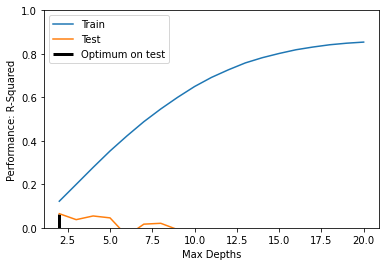

In [ ]:
# Plot
parm_optim_i= np.argmax(test_r2) 
parm_optim = depths[parm_optim_i]
print(parm_optim) #2

r2_plot(depths,"Max Depths")

2


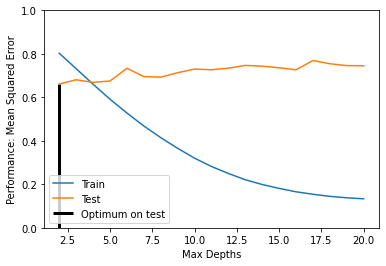

In [ ]:
# Plot
parm_optim_i= np.argmin(test_mse) 
parm_optim = depths[parm_optim_i]
print(parm_optim) #2-same

mse_plot(depths,"Max Depths")

###min_samples_split

By increasing the value of the min_samples_split, we can reduce the number of splits that happen in the decision tree and therefore prevent the model from overfitting.

In [ ]:
min_sample = np.arange(5, 60, 5)

regrf = RandomForestRegressor(max_depth=2, random_state=2021)

train_r2 = list()
test_r2 = list()
train_mse = list()
test_mse = list()
for parm in min_sample:
    regrf.set_params(min_samples_split=parm)
    start_time = time.time()
    regrf.fit(X_train1, y_train1)
    train_r2.append(regrf.score(X_train1, y_train1))
    test_r2.append(regrf.score(X_test1, y_test1))
    y_pred_train=regrf.predict(X_train1)
    train_mse.append(mean_squared_error(y_train1, y_pred_train).round(4))
    y_pred_test=regrf.predict(X_test1)
    test_mse.append(mean_squared_error(y_test1, y_pred_test).round(4))
print("--- %.3f seconds ---" % (time.time() - start_time))

--- 3.099 seconds ---


40


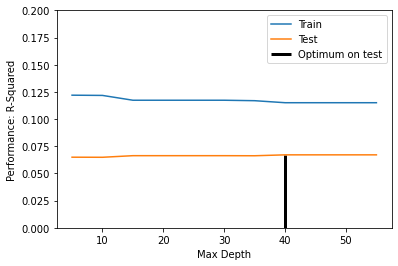

In [ ]:
# Plot
parm_optim_i= np.argmax(test_r2) 
parm_optim = min_sample[parm_optim_i]
print(parm_optim) #40

r2_plot(min_sample,"Min Samples")

40


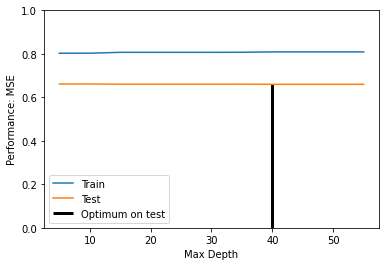

In [ ]:
# Plot
parm_optim_i= np.argmin(test_mse) 
parm_optim = min_sample[parm_optim_i]
print(parm_optim)

mse_plot(min_sample,"Min Samples")

###max_leaf_nodes

sets a condition on the splitting of the nodes in the tree and hence restricts the growth of the tree

In [ ]:
max_leaf = np.arange(5, 21, 1)

regrf = RandomForestRegressor(max_depth=2, random_state=2021,min_samples_split=40) #

train_r2 = list()
test_r2 = list()
train_mse = list()
test_mse = list()
for parm in max_leaf:
    regrf.set_params(max_leaf_nodes=parm)
    start_time = time.time()
    regrf.fit(X_train1, y_train1)
    train_r2.append(regrf.score(X_train1, y_train1))
    test_r2.append(regrf.score(X_test1, y_test1))
    y_pred_train=regrf.predict(X_train1)
    train_mse.append(mean_squared_error(y_train1, y_pred_train).round(4))
    y_pred_test=regrf.predict(X_test1)
    test_mse.append(mean_squared_error(y_test1, y_pred_test).round(4))
print("--- %.3f seconds ---" % (time.time() - start_time))

--- 9.971 seconds ---


6


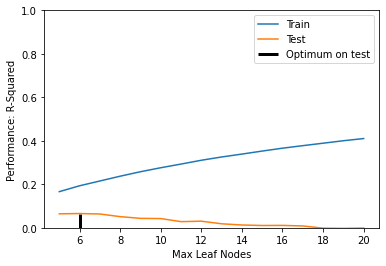

In [ ]:
# Plot
parm_optim_i= np.argmax(test_r2) 
parm_optim = max_leaf[parm_optim_i]
print(parm_optim) #5

r2_plot(max_leaf,"Max Leaf Nodes")

###min_sample_leaf

specifies the minimum number of samples that should be present in the leaf node after splitting a node

In [ ]:
min_leaf = np.arange(2, 41, 1) #2:21 pick 20, 2:41, still 20

regrf = RandomForestRegressor(max_depth=2, random_state=2021,min_samples_split=40,max_leaf_nodes=5) #

train_r2 = list()
test_r2 = list()
for parm in min_leaf:
    regrf.set_params(min_samples_leaf=parm)
    start_time = time.time()
    regrf.fit(X_train1, y_train1)
    train_r2.append(regrf.score(X_train1, y_train1))
    test_r2.append(regrf.score(X_test1, y_test1))
print("--- %.3f seconds ---" % (time.time() - start_time))

--- 7.793 seconds ---


25


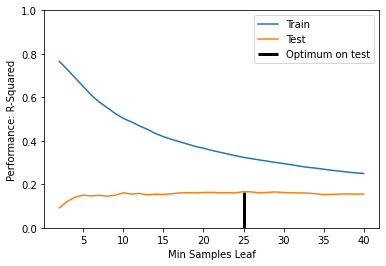

In [ ]:
# Plot
parm_optim_i= np.argmax(test_r2) 
parm_optim = min_leaf[parm_optim_i]
print(parm_optim) #20

r2_plot(min_leaf,"Min Samples Leaf")

In [ ]:
regrf = RandomForestRegressor(max_depth=2, random_state=2021,min_samples_split=40,max_leaf_nodes=5,min_samples_leaf=20)
regrf.fit(X_train1,y_train1)
y_pred1=regrf.predict(X_test1)
evaluatin_table = evaluation_metrics(y_test1, y_pred1, X_train1)
print("Median imputation")
evaluatin_table

Median imputation


,R^2,Adjusted R^2,MAE,MSE,RMSE,Pearson_Correlation
0,0.103,-2.7549,0.5596,0.6345,0.7965,0.3579


###n_estimators

number of trees to consider

In [ ]:
n_trees = np.arange(2, 39, 1) 

regrf = RandomForestRegressor(max_depth=2, random_state=2021,min_samples_split=40,max_leaf_nodes=5,min_samples_leaf=20) #

train_r2 = list()
test_r2 = list()
for parm in n_trees:
    regrf.set_params(n_estimators=parm)
    start_time = time.time()
    regrf.fit(X_train1, y_train1)
    train_r2.append(regrf.score(X_train1, y_train1))
    test_r2.append(regrf.score(X_test1, y_test1))
print("--- %.3f seconds ---" % (time.time() - start_time))

--- 1.165 seconds ---


15


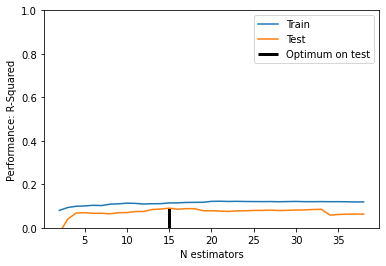

In [ ]:
# Plot
parm_optim_i= np.argmax(test_r2) 
parm_optim = n_trees[parm_optim_i]
print(parm_optim) #24

r2_plot(n_trees,"N estimators")

###max_samples

determines what fraction of the original dataset is given to any individual tree

In [ ]:
max_samples = np.arange(0.01, 1.01, 0.05) 

regrf = RandomForestRegressor(max_depth=2, random_state=2021,min_samples_split=40,max_leaf_nodes=5,min_samples_leaf=20,
                              n_estimators=24)

train_r2 = list()
test_r2 = list()
for parm in max_samples:
    regrf.set_params(max_samples=parm)
    start_time = time.time()
    regrf.fit(X_train1, y_train1)
    train_r2.append(regrf.score(X_train1, y_train1))
    test_r2.append(regrf.score(X_test1, y_test1))
print("--- %.3f seconds ---" % (time.time() - start_time))

--- 0.756 seconds ---


0.9600000000000001


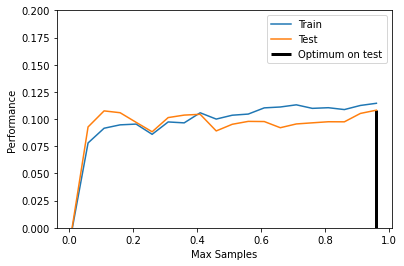

In [ ]:
# Plot
parm_optim_i= np.argmax(test_r2) 
parm_optim = max_samples[parm_optim_i]
print(parm_optim) #0.96

r2_plot(n_trees,"Max Samples")

In [ ]:
regrf.decision_path(X_train1)

(<1710x166 sparse matrix of type '<class 'numpy.longlong'>'
 	with 123063 stored elements in Compressed Sparse Row format>,
 array([  0,   7,  14,  21,  28,  35,  40,  47,  54,  61,  68,  75,  82,
         89,  96, 103, 110, 117, 124, 131, 138, 145, 152, 159, 166]))

In [ ]:
regrf.apply(X_train1)

array([[5, 3, 3, ..., 5, 6, 3],
       [5, 5, 5, ..., 3, 3, 3],
       [5, 3, 5, ..., 6, 5, 3],
       ...,
       [5, 3, 5, ..., 5, 3, 3],
       [4, 3, 6, ..., 6, 4, 3],
       [5, 3, 6, ..., 5, 5, 4]])

###max_features

number of maximum features provided to each tree in a random forest

In [ ]:
max_features = np.arange(50, 325, 5) 

regrf = RandomForestRegressor(max_depth=2, random_state=2021,min_samples_split=40,max_leaf_nodes=5,min_samples_leaf=20,
                              n_estimators=24,max_samples=0.96)

train_r2 = list()
test_r2 = list()
for parm in max_features:
    regrf.set_params(max_features=parm)
    start_time = time.time()
    regrf.fit(X_train1, y_train1)
    train_r2.append(regrf.score(X_train1, y_train1))
    test_r2.append(regrf.score(X_test1, y_test1))
print("--- %.3f seconds ---" % (time.time() - start_time))

--- 0.743 seconds ---


190


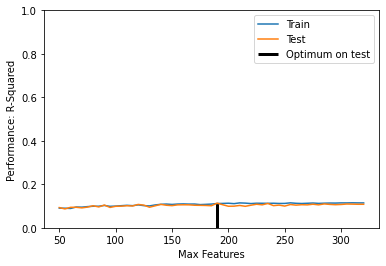

In [ ]:
# Plot
parm_optim_i= np.argmax(test_r2) 
parm_optim = max_features[parm_optim_i]
print(parm_optim) #190

r2_plot(max_features,"Max Features")

###Final model

In [ ]:
regrf = RandomForestRegressor(max_depth=2, random_state=2021,min_samples_split=40,max_leaf_nodes=5,min_samples_leaf=20,
                              n_estimators=24,max_samples=0.96,max_features=190)
regrf.fit(X_train1,y_train1)
y_pred1=regrf.predict(X_test1)
evaluatin_table = evaluation_metrics(y_test1, y_pred1, X_train1)
print("Median imputation, max features per tree=190")
evaluatin_table

Median imputation, max features per tree=190


,R^2,Adjusted R^2,MAE,MSE,RMSE,Pearson_Correlation
0,0.1133,-2.712,0.5592,0.6272,0.792,0.4061


In [ ]:
regrf = RandomForestRegressor(max_depth=2, random_state=2021,min_samples_split=40,max_leaf_nodes=5,min_samples_leaf=20,
                              n_estimators=24,max_samples=0.96,max_features="log2")
regrf.fit(X_train1,y_train1)
y_pred1=regrf.predict(X_test1)
evaluatin_table = evaluation_metrics(y_test1, y_pred1, X_train1)
print("Median imputation, max features=log2")
evaluatin_table

Median imputation


,R^2,Adjusted R^2,MAE,MSE,RMSE,Pearson_Correlation
0,0.038,-3.027,0.5911,0.6804,0.8249,0.2696


In [ ]:
regrf = RandomForestRegressor(max_depth=2, random_state=2021,min_samples_split=40,max_leaf_nodes=5,min_samples_leaf=20,
                              n_estimators=24,max_samples=0.96,max_features="sqrt")
regrf.fit(X_train1,y_train1)
y_pred1=regrf.predict(X_test1)
evaluatin_table = evaluation_metrics(y_test1, y_pred1, X_train1)
print("Median imputation, max features=sqrt")
evaluatin_table

Median imputation, max features=sqrt


,R^2,Adjusted R^2,MAE,MSE,RMSE,Pearson_Correlation
0,0.0529,-2.965,0.584,0.67,0.8185,0.3045


In [ ]:
#Since max_depths has most influence on performance, do it again with other selected parms
regrf = RandomForestRegressor(random_state=2021,min_samples_split=40,max_leaf_nodes=5,min_samples_leaf=20,
                              n_estimators=24,max_samples=0.96,max_features=190)
depths = np.arange(2, 21, 1)
train_mse = list()
test_mse = list()
for parm in depths:
    regrf.set_params(max_depth=parm)
    start_time = time.time()
    regrf.fit(X_train1, y_train1)
    y_pred_train=regrf.predict(X_train1)
    train_mse.append(mean_squared_error(y_train1, y_pred_train).round(4))
    y_pred_test=regrf.predict(X_test1)
    test_mse.append(mean_squared_error(y_test1, y_pred_test).round(4))

print("--- %.3f seconds ---" % (time.time() - start_time))

--- 0.727 seconds ---


3


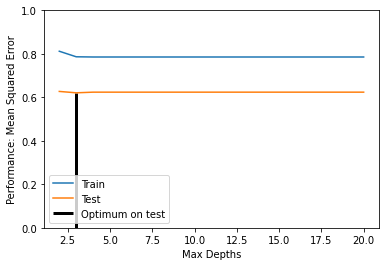

In [ ]:
parm_optim_i= np.argmin(test_mse) 
parm_optim = depths[parm_optim_i]
print(parm_optim) #3

mse_plot(depths,"Max Depths")

In [ ]:
regrf = RandomForestRegressor(max_depth=parm_optim,random_state=2021,min_samples_split=40,max_leaf_nodes=5,min_samples_leaf=20,
                              n_estimators=24,max_samples=0.96,max_features=190)

regrf.fit(X_train1,y_train1)
y_pred1=regrf.predict(X_test1)
evaluatin_table = evaluation_metrics(y_test1, y_pred1, X_train1)
print("Median imputation")
evaluatin_table

Median imputation


,R^2,Adjusted R^2,MAE,MSE,RMSE,Pearson_Correlation
0,0.1223,-2.6742,0.555,0.6208,0.7879,0.4069


##Feature Importance

In [ ]:
features=regrf.feature_importances_
#print(features>0)
n_select=np.shape(features[features>0])[0]
print("Number of features selected:",n_select) #28->29-model with highest correlation above
importance_sort=np.sort(features[features>0])[::-1]
print(importance_sort)
features_ind=np.argsort(features,axis=None)[::-1]
print(features_ind[0:n_select])
features_name=regrf.feature_names_in_[features_ind[0:n_select]]
print(features_name)

Number of features selected: 29
[0.33819042 0.13469926 0.08256661 0.04322316 0.03872192 0.03335138
 0.03028718 0.01969409 0.01939814 0.01871766 0.01774606 0.01692488
 0.01658274 0.01646888 0.01643871 0.01550451 0.01479151 0.01415116
 0.01297947 0.01164722 0.01129212 0.01103631 0.01091262 0.01019986
 0.00989541 0.00897937 0.0089188  0.00841332 0.00826725]
[ 14  36 297 296 214  25 305 148 310 278  70 302 311 322 109 252 193 213
  76 196  57  45 313 282 309  68 303 147 308]
['slope_first_3_months' 'SymOnsetDelta' 'BMI_slope' 'Weight_kg_slope'
 'Basophils_ValueSd' 'OnsetDelta' 'fvc_liters_valueSum'
 'AbsoluteBasophilCount_ValueSd' 'fvc_liters_DeltaSlope'
 'Blood_Pressure_Systolic_last' 'Glucose_ValueSd' 'fvc_liters_ValueLast'
 'fvc_liters_SlopeMax' 'site_onset1' 'Chloride_ValueAve' 'Weight_kg_mean'
 'Phosphorus_ValueAve' 'Basophils_ValueMax' 'Hemoglobin_ValueSd'
 'Phosphorus_ValueSd' 'ASTSGOT_ValueMax' 'WhiteBloodCellWBC_ValueMax'
 'fvc_liters_SlopeLast' 'Weight_kg_last' 'fvc_liters_ValueS

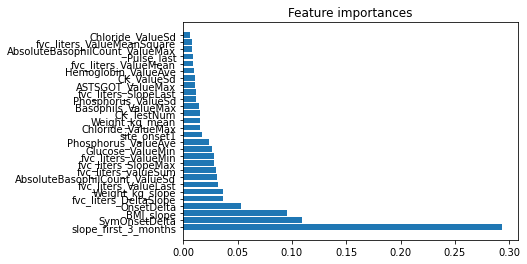

In [ ]:
plt.barh(width=importance_sort, y=features_name[0:n_select]) #plt.bar(height=,x=)
plt.title("Feature importances")
#plt.xticks(rotation=90)
plt.show()

##Random Search to find best parameters

In [ ]:
# define search space, params: distributions or list (sampled uniformly)
#max_depth=2, random_state=2021,min_samples_split=40,max_leaf_nodes=5,min_samples_leaf=20,
#n_estimators=24,max_samples=0.96,max_features=190
space = dict()
space['max_depth'] = np.arange(2,20,2)
space['min_samples_split'] = np.arange(2,100,10)
space['max_leaf_nodes'] = np.arange(2,20,1)
space['min_samples_leaf'] = np.arange(5,30,5)
space['n_estimators'] = np.arange(20,100,5)
space['max_samples'] = np.arange(0.5,1.001,0.05)
space['max_features'] = np.arange(30,325,25)

In [ ]:
# define search
model=RandomForestRegressor()
#search = RandomizedSearchCV(model, space, n_iter=500, scoring=None, n_jobs=-1, cv=None, random_state=2021)

In [ ]:
search = RandomizedSearchCV(model, space, n_iter=500, scoring='neg_mean_squared_error', n_jobs=-1, cv=None, random_state=2021)

###Median imputed data

In [ ]:
# execute search
start_time=time.time()
result = search.fit(X_train1, y_train1)
print("--- %.3f seconds ---" % (time.time() - start_time)) #1462 s
# summarize result
print('Best Score: %.3f' % result.best_score_) #0.093 R2, 0.826 MSE
print(result.best_estimator_)
print(result.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
255 fits failed out of a total of 2500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
255 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 380, in fit
    n_samples=X.shape[0], max_samples=self.max_samples
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 117, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
Valu

--- 2014.738 seconds ---
Best Score: -0.825
RandomForestRegressor(max_depth=12, max_features=305, max_leaf_nodes=19,
                      max_samples=0.8000000000000003, min_samples_leaf=25,
                      min_samples_split=12, n_estimators=20)
{'n_estimators': 20, 'min_samples_split': 12, 'min_samples_leaf': 25, 'max_samples': 0.8000000000000003, 'max_leaf_nodes': 19, 'max_features': 305, 'max_depth': 12}


In [ ]:
#best when scoring use default-R2
best=RandomForestRegressor(max_depth=14, max_features=135, max_leaf_nodes=15,
                          max_samples=0.751, min_samples_leaf=25,
                          min_samples_split=62, n_estimators=52,random_state=2021) 
best.fit(X_train1,y_train1)
y_pred1=best.predict(X_test1)
evaluatin_table = evaluation_metrics(y_test1, y_pred1, X_train1)
print("Median imputation, Random Search Best Model")
evaluatin_table

Median imputation, Random Search Best Model


,R^2,Adjusted R^2,MAE,MSE,RMSE,Pearson_Correlation
0,0.1429,-2.5882,0.5414,0.6063,0.7787,0.398


In [ ]:
#best when scoring use MSE negative
best=RandomForestRegressor(max_depth=16, max_features=305, max_leaf_nodes=19,
                          max_samples=0.551, min_samples_leaf=20,
                          min_samples_split=12, n_estimators=82,random_state=2021) 
best.fit(X_train1,y_train1)
y_pred1=best.predict(X_test1)
evaluatin_table = evaluation_metrics(y_test1, y_pred1, X_train1)
print("Median imputation, Random Search Best Model")
evaluatin_table

Median imputation, Random Search Best Model


,R^2,Adjusted R^2,MAE,MSE,RMSE,Pearson_Correlation
0,0.1492,-2.5616,0.5364,0.6018,0.7758,0.3978


In [ ]:
best=RandomForestRegressor(max_depth=12, max_features=305, max_leaf_nodes=19,
                          max_samples=0.8, min_samples_leaf=25,
                          min_samples_split=12, n_estimators=20,random_state=2021) 

best.fit(X_train1,y_train1)
y_pred1=best.predict(X_test1)
evaluatin_table = evaluation_metrics(y_test1, y_pred1, X_train1)
print("Median imputation, Random Search Best Model")
evaluatin_table

Median imputation, Random Search Best Model


,R^2,Adjusted R^2,MAE,MSE,RMSE,Pearson_Correlation
0,0.158,-2.5249,0.5345,0.5956,0.7718,0.4051


###KNN imputed data

In [ ]:
# execute search
start_time=time.time()
result = search.fit(X_train2, y_train2)
print("--- %.3f seconds ---" % (time.time() - start_time)) #1462 s
# summarize result
print('Best Score: %.3f' % result.best_score_) #0.093 R2, 0.826 MSE
print(result.best_estimator_)
print(result.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
255 fits failed out of a total of 2500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
255 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 380, in fit
    n_samples=X.shape[0], max_samples=self.max_samples
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 117, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
Valu

--- 2355.601 seconds ---
Best Score: -0.835
{'n_estimators': 50, 'min_samples_split': 62, 'min_samples_leaf': 25, 'max_samples': 0.7500000000000002, 'max_leaf_nodes': 19, 'max_features': 280, 'max_depth': 14}


In [ ]:
best=RandomForestRegressor(max_depth=14, max_features=280, max_leaf_nodes=19,
                          max_samples=0.75, min_samples_leaf=25,
                          min_samples_split=62, n_estimators=50,random_state=2021) 

best.fit(X_train2,y_train2)
y_pred2=best.predict(X_test2)
evaluatin_table = evaluation_metrics(y_test2, y_pred2, X_train2)
print("KNN imputation, Random Search Best Model")
evaluatin_table

KNN imputation, Random Search Best Model


,R^2,Adjusted R^2,MAE,MSE,RMSE,Pearson_Correlation
0,0.1494,-2.5607,0.5407,0.6016,0.7757,0.407


##Feature Importance

In [ ]:
features=best.feature_importances_
#print(features>0)
n_select=np.shape(features[features>0])[0]
print("Number of features selected:",n_select) #227
importance_sort=np.sort(features[features>0])[::-1]
#print(importance_sort)
features_ind=np.argsort(features,axis=None)[::-1]
#print(features_ind[0:n_select])
features_name=best.feature_names_in_[features_ind[0:n_select]]
print(features_name[0:30])

Number of features selected: 227
['slope_first_3_months' 'SymOnsetDelta' 'OnsetDelta'
 'fvc_liters_DeltaSlope' 'Weight_kg_slope' 'BMI_slope'
 'fvc_liters_ValueLast' 'fvc_liters_ValueMin' 'Basophils_ValueSd'
 'ALSFRS_Total_3_month' 'fvc_liters_SlopeMin' 'fvc_liters_SlopeLast'
 'site_onset1' 'fvc_liters_ValueStd' 'Respiratory_Rate_mean' 'BMI_sd'
 'AbsoluteBasophilCount_ValueSd' 'fvc_liters_valueSum'
 'Bicarbonate_ValueAve' 'Glucose_ValueMin' 'Age' 'Delta_3_month'
 'fvc_liters_SlopeMax' 'site_onset2' 'WhiteBloodCellWBC_ValueAve'
 'Phosphorus_ValueAve' 'BloodUreaNitrogenBUN_ValueAve'
 'fvc_liters_ValueMeanSquare' 'fvc_liters_SlopeDeltaSlope'
 'Respiratory_Rate_sd']


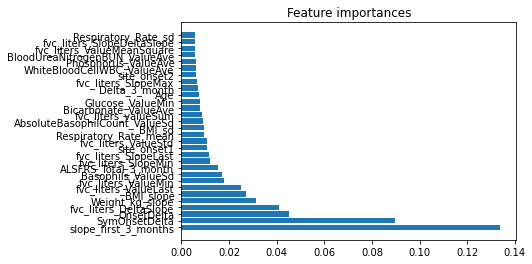

In [ ]:
plt.barh(width=importance_sort[0:30], y=features_name[0:30]) #plt.bar(height=,x=)
plt.title("Feature importances")
#plt.xticks(rotation=90)
plt.show()

##Try Cross-Validation

In [ ]:
#Combine train and test conduct CV
X1=np.vstack((X_train1,X_test1))
y1=y_train1.append(y_test1)
# define search
model=RandomForestRegressor()
search = RandomizedSearchCV(model, space, n_iter=500, scoring="neg_mean_squared_error", n_jobs=-1, cv=5, random_state=2021)

In [ ]:
# execute search
start_time=time.time()
result = search.fit(X1, y1) #2042.5 s
print("--- %.3f seconds ---" % (time.time() - start_time)) #1462 s

--- 2042.502 seconds ---


In [ ]:
# summarize result
print('Best Score: %.3f' % result.best_score_) #0.093 R2, 0.826 MSE
print(result.best_estimator_)
print(result.best_params_)

Best Score: -0.780
RandomForestRegressor(max_depth=8, max_features=265, max_leaf_nodes=14,
                      max_samples=0.6010000000000001, min_samples_leaf=25,
                      min_samples_split=32, n_estimators=62)
{'n_estimators': 62, 'min_samples_split': 32, 'min_samples_leaf': 25, 'max_samples': 0.6010000000000001, 'max_leaf_nodes': 14, 'max_features': 265, 'max_depth': 8}


In [ ]:
best=RandomForestRegressor(max_depth=8, max_features=265, max_leaf_nodes=14,
                            max_samples=0.6010000000000001, min_samples_leaf=25,
                            min_samples_split=32, n_estimators=62,random_state=2021)
best.fit(X_train1,y_train1) 
y_pred1=best.predict(X_test1)
evaluatin_table = evaluation_metrics(y_test1, y_pred1, X_train1)
print("Median imputation, Random Search Best Model")
evaluatin_table

Median imputation, Random Search Best Model


,R^2,Adjusted R^2,MAE,MSE,RMSE,Pearson_Correlation
0,0.1484,-2.5648,0.5389,0.6024,0.7761,0.4062


##Grid Search

In [ ]:
# define search space, params
#max_depth=2, random_state=2021,min_samples_split=40,max_leaf_nodes=5,min_samples_leaf=20,
#n_estimators=24,max_samples=0.96,max_features=190
space = dict()
space['max_depth'] = np.arange(5,25,5)
space['min_samples_split'] = np.arange(30,50,5)
space['max_leaf_nodes'] = np.arange(2,10,2)
space['min_samples_leaf'] = np.arange(15,30,5)
space['n_estimators'] = np.arange(10,25,5)
space['max_samples'] = np.arange(0.5,1.1,0.1)
space['max_features'] = np.array([50,100,200,325])

In [ ]:
# define search
model=RandomForestRegressor()
search = GridSearchCV(model, space, scoring='neg_mean_squared_error', n_jobs=-1, cv=None)

In [ ]:
# execute search
start_time=time.time()
#result = search.fit(X_train1, y_train1) #almost 6 hours of run time and terminated, limit range of parameters
print("--- %.3f seconds ---" % (time.time() - start_time)) #13342 s
# summarize result
print('Best Score: %.3f' % result.best_score_) 
print(result.best_estimator_)
print(result.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
11520 fits failed out of a total of 80640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
11520 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 380, in fit
    n_samples=X.shape[0], max_samples=self.max_samples
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 117, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))

--- 13341.847 seconds ---
Best Score: -0.832
{'max_depth': 15, 'max_features': 325, 'max_leaf_nodes': 8, 'max_samples': 0.5, 'min_samples_leaf': 25, 'min_samples_split': 35, 'n_estimators': 20}


In [ ]:
#best when scoring use MSE negative
best=RandomForestRegressor(max_depth=15, max_features=325, max_leaf_nodes=8,
                          max_samples=0.5, min_samples_leaf=25,
                          min_samples_split=35, n_estimators=20,random_state=2021) 
best.fit(X_train1,y_train1)
y_pred1=best.predict(X_test1)
evaluatin_table = evaluation_metrics(y_test1, y_pred1, X_train1)
print("Median imputation, Random Search Best Model")
print(evaluatin_table)
best=RandomForestRegressor(max_depth=16, max_features=305, max_leaf_nodes=19,
                          max_samples=0.551, min_samples_leaf=20,
                          min_samples_split=12, n_estimators=82,random_state=2021) 
best.fit(X_train1,y_train1)
y_pred1=best.predict(X_test1)
evaluatin_table = evaluation_metrics(y_test1, y_pred1, X_train1)
print("Median imputation, Random Search Best Model")
evaluatin_table

Median imputation, Random Search Best Model
      R^2  Adjusted R^2     MAE     MSE    RMSE  Pearson_Correlation
0  0.1158       -2.7013  0.5483  0.6254  0.7908               0.3518
Median imputation, Random Search Best Model


,R^2,Adjusted R^2,MAE,MSE,RMSE,Pearson_Correlation
0,0.1492,-2.5616,0.5364,0.6018,0.7758,0.3978


Better and faster with Randomized Search